In [155]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

image: (512, 512)   min: 0.0   max: 0.949019607843
kernel: (32, 32)   min: 0.0   max: 0.0627450980392


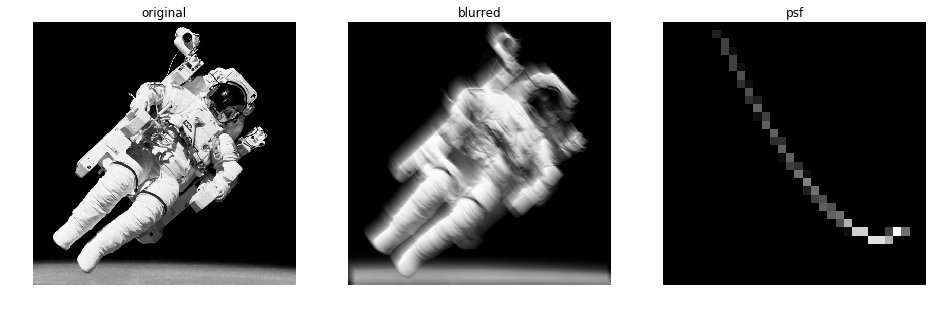

In [189]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from pprint import pprint

plt.rcParams["figure.figsize"] = 16, 10

original= io.imread('scaled.png')
blurred= io.imread('blurred.png')/255
kernel= np.load("swirl.npy")

print ("image:" , blurred.shape , "  min:" , np.min(blurred), "  max:" , np.max(blurred))
print ("kernel:" , kernel.shape , "  min:" , np.min(kernel), "  max:" , np.max(kernel))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 12))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(original)
ax[0].set_title('original')

ax[1].imshow(blurred)
ax[1].set_title('blurred')

ax[2].imshow(kernel)
ax[2].set_title('psf')


plt.show()

psf: (32, 32)   min: 0.001   max: 0.0637450980392
image: (512, 512)   min: -0.000156862745098   max: 0.949764705882

RL deconv 20 iterations


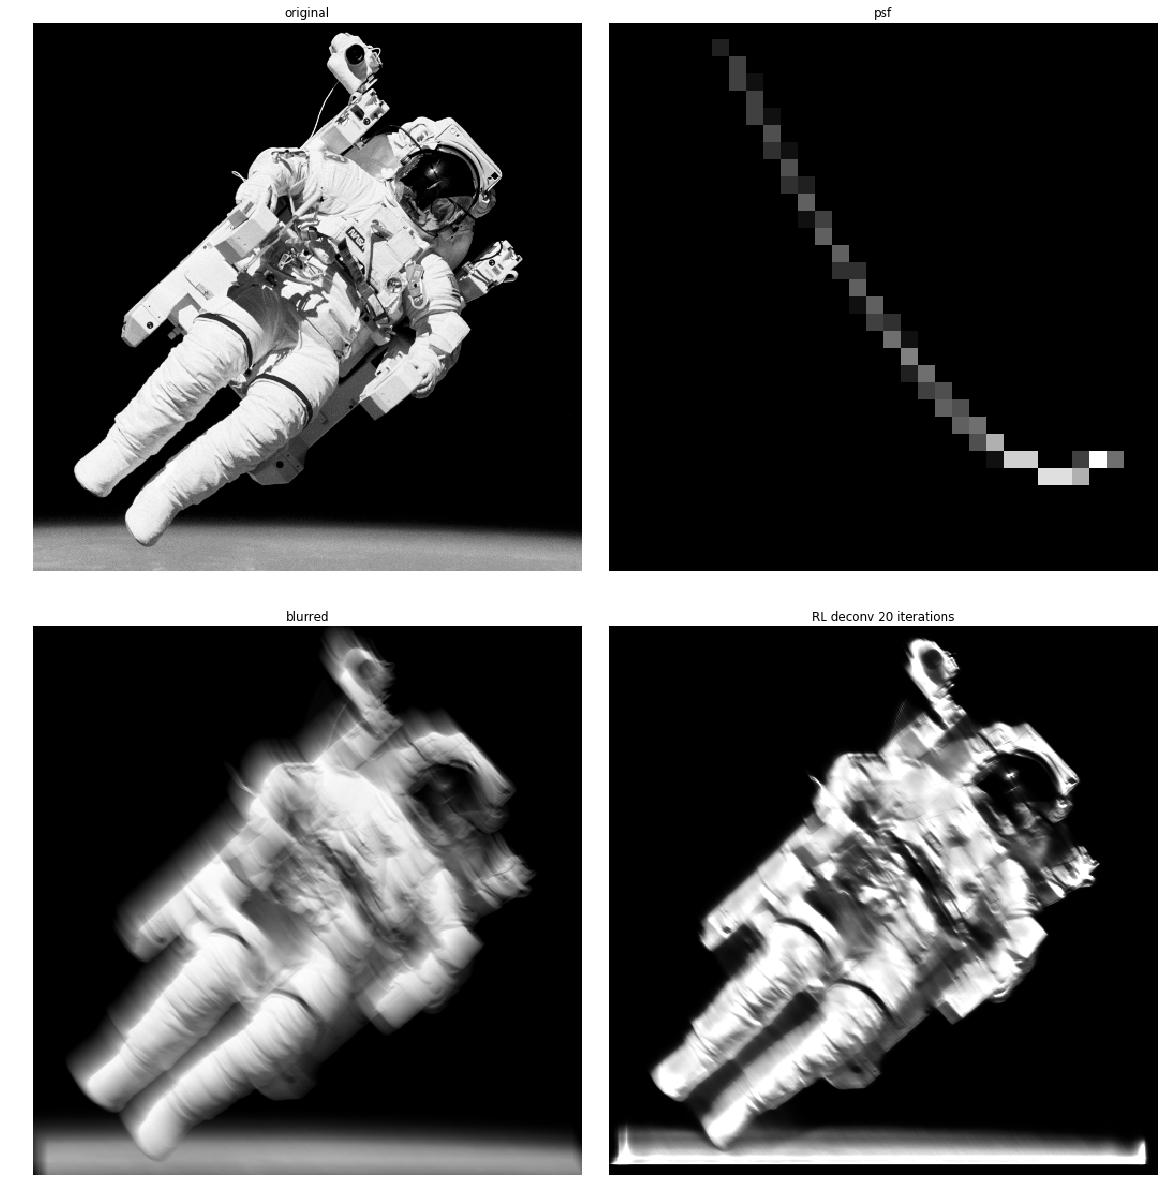

In [225]:
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from pprint import pprint


def showPics(pics):
    
    plt.rcParams["figure.figsize"] = 16, 16
    n= len(pics)

    cols= 2
    rows= int((n+1)/cols)

    r= 1
    c= 1
    i= 1
    
    for pic in pics:
        if (c>cols):
            c= 0
            r+= 1
        
        plt.subplot(rows, cols, i)
        plt.imshow(pic[0])
        plt.title(pic[1])
        
        i+= 1
        c+= 1
        plt.axis('off')
            
    plt.gray()
    plt.subplots_adjust(wspace=0, hspace=0.1, top=1, bottom=0, left=0, right=1)
    plt.show()    
    
    return

psf = kernel + 0.001
astro = blurred.astype(float).copy()


#astro= color.rgb2gray(data.astronaut())
#psf = np.ones((5, 5)) / 25

astro= astro.copy() + (np.random.poisson(lam=25, size=astro.shape) - 10) / 25500.



print ("psf:" , psf.shape , "  min:" , np.min(psf), "  max:" , np.max(psf))
print ("image:" , astro.shape , "  min:" , np.min(astro), "  max:" , np.max(astro))

    
runs= 20
    
print()
print ('RL deconv ' + str(runs) + " iterations")

# Restore Image using Richardson-Lucy algorithm
deconv = restoration.richardson_lucy(astro, psf, iterations= runs)

#fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))


showPics([
    [original, "original"], 
    [psf, "psf"], 
    [blurred, "blurred"],
    [deconv, 'RL deconv ' + str(runs) + " iterations"]])


